# Initial Insights - Movies, Genres, and Gross Sales

Our goals in this stage of the project will be to develop initial insights about our data using the techniques discussed in class. Given our movie data, our aims are to gain insights on the following:

- 1) What kind of movie genres are popular in which year (insights about time trends)
- 2) What kind of correlation (if any) is there between movie genre and gross sales



We first did some pre-processing our Table E from stage 4. We split up genre and reformatted the data from wide to long. Below, we will continue working with the long format.

Additionally, our analysis below will focus on movies released in 2000 or later. We will doe this for the insights below to help us account for social differences in how people rate movies and relate to movie databases. Additionally, since this is an exploratory analysis, we want to first use the cleanest sample available and then we can go back and incorporate older data once we understand how data was collected, reviewed, and cleaned before we obtained it so we can best control for any systematic bias.

## Genre Trends by Year (Roll-Up)

In [1]:
#import modules
import csv
import pandas as pd
import numpy as np
import time
import sys
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.font_manager import FontProperties


fontP = FontProperties()
fontP.set_size('small')

In [2]:
df = pd.read_csv("../DATA/movie_genre.csv", encoding='mac_roman')
df.shape

(61804, 9)

In [3]:
df.head(n=20)

,lid,rid,title,year,genres,gross,cast_total_facebook_likes,director_facebook_likes,imdb_score
0,1.0,72998.0,Avatar,2009,sci-fi,760505847,4834.0,0,7.9
1,1.0,72998.0,Avatar,2009,action,760505847,4834.0,0,7.9
2,1.0,72998.0,Avatar,2009,fantasy,760505847,4834.0,0,7.9
3,1.0,72998.0,Avatar,2009,adventure,760505847,4834.0,0,7.9
4,1.0,72998.0,Avatar,2009,imax,760505847,4834.0,0,7.9
5,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,comedy,309404152,48350.0,563,7.1
6,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,fantasy,309404152,48350.0,563,7.1
7,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,action,309404152,48350.0,563,7.1
8,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,adventure,309404152,48350.0,563,7.1
9,3.0,127216.0,Unexpected,2015,action,200074175,11700.0,0,6.8


In [4]:
#cleanup
df['rid'] = df['rid'].astype(str)
df['lid'] = df['lid'].astype(str)
df.dtypes

lid                           object
rid                           object
title                         object
year                          object
genres                        object
gross                         object
cast_total_facebook_likes    float64
director_facebook_likes       object
imdb_score                   float64
dtype: object

In [5]:
#what are the unique genre levels?
df.genres.unique()
df.year.unique()

array(['2009', '2007', '2015', '2012', '.', '2010', '2016', '2006', '2008',
       '2013', '2011', '2014', '2005', '1997', '2004', '1999', '1995',
       '2003', '2001', '2002', '1998', '2000', '1990', '1991', '1994',
       '1996', '1982', '1993', '1979', '1992', '1989', '1984', '1988',
       '1978', '1962', '1980', '1972', '1981', '1968', '1985', '1940',
       '1963', '1987', '1986', '1973', '1983', '1976', '1977', '1970',
       '1971', '1969', '1960', '1965', '1964', '1927', '1974', '1937',
       '1975', '1967', '1951', '1961', '1946', '1953', '1954', '1959',
       '1932', '1947', '1956', '1945', '1952', '1930', '1966', '1939',
       '1950', '1948', '1958', '1957', '1943', '1944', '1938', '1949',
       '1936', '1941', '1955', '1942', '1929', '1935', '1933', '1916',
       '1934', '1925', '1920', '1926', '1931', '1922', '1928', '1914',
       '1919', '1923', '1918', '1921', '1924', '1915', '1917', '948)',
       '965)', '988)', '999)', '003)', '002)', '995)', '1902', '001)',
 

In [6]:
#keep only where both year and genre exist
subdf = df.loc[df['rid'].notnull() & (df['genres']!= "(no genres listed)")]
subdf.head(n=20)


,lid,rid,title,year,genres,gross,cast_total_facebook_likes,director_facebook_likes,imdb_score
0,1.0,72998.0,Avatar,2009,sci-fi,760505847,4834.0,0,7.9
1,1.0,72998.0,Avatar,2009,action,760505847,4834.0,0,7.9
2,1.0,72998.0,Avatar,2009,fantasy,760505847,4834.0,0,7.9
3,1.0,72998.0,Avatar,2009,adventure,760505847,4834.0,0,7.9
4,1.0,72998.0,Avatar,2009,imax,760505847,4834.0,0,7.9
5,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,comedy,309404152,48350.0,563,7.1
6,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,fantasy,309404152,48350.0,563,7.1
7,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,action,309404152,48350.0,563,7.1
8,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,adventure,309404152,48350.0,563,7.1
9,3.0,127216.0,Unexpected,2015,action,200074175,11700.0,0,6.8


In [7]:
#keep data only since 2000
#keep only where both year and genre exist
subdf = subdf.loc[(df['year']== "2000") | (df['year']== "2001") | (df['year']== "2002") | 
             (df['year']== "2003") | (df['year']== "2004") | (df['year']== "2005") | (df['year']== "2006") |
             (df['year']== "2007") | (df['year']== "2008") | (df['year']== "2009") | (df['year']== "2010") | 
             (df['year']== "2011") | (df['year']== "2012") | (df['year']== "2013") | (df['year']== "2014") | 
             (df['year']== "2015") | (df['year']== "2016")]
subdf.head(n=20)

,lid,rid,title,year,genres,gross,cast_total_facebook_likes,director_facebook_likes,imdb_score
0,1.0,72998.0,Avatar,2009,sci-fi,760505847,4834.0,0,7.9
1,1.0,72998.0,Avatar,2009,action,760505847,4834.0,0,7.9
2,1.0,72998.0,Avatar,2009,fantasy,760505847,4834.0,0,7.9
3,1.0,72998.0,Avatar,2009,adventure,760505847,4834.0,0,7.9
4,1.0,72998.0,Avatar,2009,imax,760505847,4834.0,0,7.9
5,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,comedy,309404152,48350.0,563,7.1
6,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,fantasy,309404152,48350.0,563,7.1
7,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,action,309404152,48350.0,563,7.1
8,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,adventure,309404152,48350.0,563,7.1
9,3.0,127216.0,Unexpected,2015,action,200074175,11700.0,0,6.8


In [8]:
subdf.shape

(30629, 9)

Let's first explore what is going on with all the genres:

In [9]:
sub = subdf[['title', 'genres','year']]
sub1 = sub.groupby(['genres','year'])['year'].count().unstack('genres')
sub1

genres,action,adventure,animation,biography,children,comedy,crime,documentary,drama,family,...,musical,mystery,news,romance,sci-fi,short,sport,thriller,war,western
year,,,,,,,,,,,,,,,,,,,,,
2000,77.0,54.0,29.0,7.0,25.0,242.0,85.0,51.0,351.0,19.0,...,15.0,35.0,NaN,133.0,39.0,NaN,9.0,128.0,13.0,8.0
2001,109.0,51.0,28.0,8.0,22.0,244.0,90.0,55.0,368.0,15.0,...,21.0,57.0,NaN,135.0,41.0,NaN,9.0,130.0,30.0,5.0
2002,106.0,66.0,34.0,9.0,35.0,247.0,119.0,65.0,396.0,25.0,...,21.0,62.0,NaN,146.0,50.0,NaN,10.0,143.0,30.0,4.0
2003,114.0,69.0,30.0,10.0,40.0,254.0,104.0,77.0,355.0,19.0,...,26.0,53.0,NaN,123.0,42.0,NaN,3.0,143.0,25.0,7.0
2004,121.0,83.0,38.0,13.0,29.0,252.0,83.0,93.0,397.0,29.0,...,23.0,57.0,NaN,144.0,55.0,NaN,12.0,139.0,32.0,10.0
2005,127.0,94.0,25.0,11.0,35.0,259.0,103.0,96.0,438.0,29.0,...,25.0,62.0,NaN,153.0,43.0,NaN,17.0,166.0,30.0,8.0
2006,114.0,101.0,51.0,15.0,39.0,298.0,113.0,115.0,480.0,34.0,...,24.0,71.0,NaN,158.0,50.0,NaN,14.0,192.0,36.0,4.0
2007,112.0,70.0,46.0,18.0,31.0,290.0,127.0,128.0,492.0,20.0,...,34.0,60.0,NaN,173.0,47.0,2.0,9.0,191.0,48.0,9.0
2008,154.0,101.0,53.0,14.0,35.0,285.0,115.0,165.0,502.0,28.0,...,29.0,69.0,NaN,170.0,70.0,1.0,9.0,197.0,54.0,8.0


In [10]:
list(sub1.columns.values)

['action',
 'adventure',
 'animation',
 'biography',
 'children',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'history',
 'horror',
 'imax',
 'music',
 'musical',
 'mystery',
 'news',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'thriller',
 'war',
 'western']

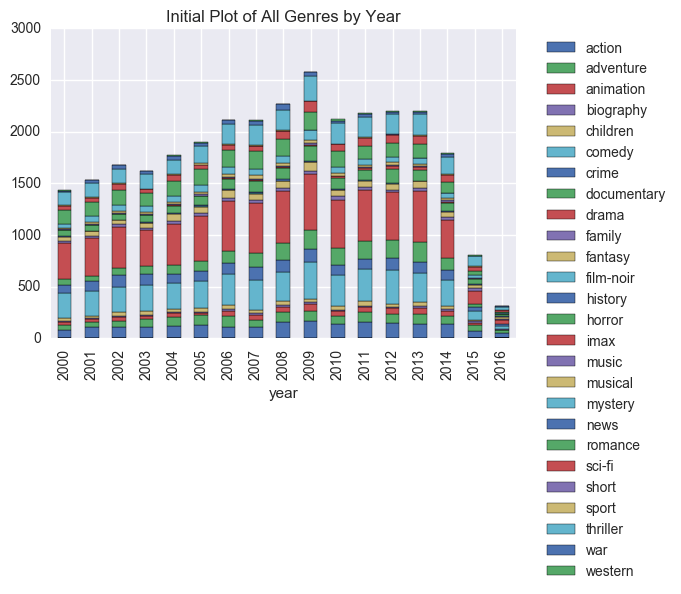

In [11]:
sub1.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title("Initial Plot of All Genres by Year")

*Initial Insights*: Firstly, there are too many genres for us to be able to discern anything, especially because colors are repeated. We do, however, identify that fewer movies were made in 2015. This is likely true since data may not have been updated prior to beginning our analysis. Also, we see that in 2009 there were many more genres types. We cannot be certain if this means there were more movies made in that year. That is then a good starting point - let's identify if there were any differences amongst years in how many movies were produced each year.

Next, let's get a sense of how many movies there are per year.

In [12]:
##drop duplicates
dftitle = subdf.drop_duplicates(subset=['title', 'year'], keep=False)
dftitle.head()

,lid,rid,title,year,genres,gross,cast_total_facebook_likes,director_facebook_likes,imdb_score
1535,332.0,96110.0,"Campaign, The",2012,comedy,86897182,9271.0,116,6.2
2032,441.0,86911.0,"Hangover Part II, The",2011,comedy,254455986,16143.0,480,6.5
2072,450.0,104218.0,Grown Ups 2,2013,comedy,133668525,39269.0,221,5.4
2456,536.0,79134.0,Grown Ups,2010,comedy,162001186,28497.0,221,6.0
2759,608.0,80590.0,Wall Street: Money Never Sleeps,2010,drama,52474616,1579.0,0,6.3


In [13]:
sub2 = dftitle.groupby(['year'])['year'].count()


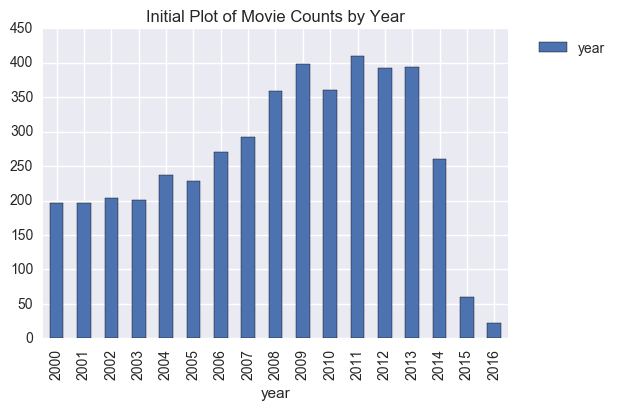

In [14]:
sub2.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title("Initial Plot of Movie Counts by Year")

Based on this, we can see that 2015 appears to be an outlier. Also, we see that 2000 and 2001 have very close counts for movies. Additionally, we find an increase in the amount of movies produced (based on our data) from about 2007 through 2013, and a decrease following that. Since we do not know exactly how this data was collected, we cannot rule out survey/data collection issues. For this analysis, we will take this as given and continue with the analysis.

This also gives us insight into what was happening in 2009 in regards to genre. Although 2009 was a high movie-volume year, so was 2012. However in our first plat of genre, 2012 does not have as many genres. This leads us to think that in 2009 there were many more movies that had multiple genres attributed to them. Given that there are too many genres for us really understand, let's roll-up and break the groups into large categories.

### Roll-up on larger genre groups

In [15]:
def label_bigGenre(row):
    if row['genres'] == 'action':
        return 'action-adventure'
    if row['genres'] == 'adventure':
        return 'action-adventure'
    if row['genres'] == 'children':
        return 'family-children'
    if row['genres'] == 'crime':
        return 'drama'
    if row['genres'] == 'drama':
        return 'drama'
    if row['genres'] == 'family':
        return 'family-children'
    if row['genres'] == 'fantasy':
        return 'fantasy/scifi'
    if row['genres'] == 'film-noir':
        return 'drama'
    if row['genres'] == 'history':
        return 'drama'
    if row['genres'] == 'horror':
        return 'horror'
    if row['genres'] == 'romance':
        return 'romance-comedy'
    if row['genres'] == 'comedy':
        return 'romance-comedy'
    if row['genres'] == 'sci-fi':
        return 'fantasy/scifi'
    if row['genres'] == 'thriller':
        return 'horror'
    if row['genres'] == 'war':
        return 'drama'
    return 'Other'


In [16]:
subdf.head()

,lid,rid,title,year,genres,gross,cast_total_facebook_likes,director_facebook_likes,imdb_score
0,1.0,72998.0,Avatar,2009,sci-fi,760505847,4834.0,0,7.9
1,1.0,72998.0,Avatar,2009,action,760505847,4834.0,0,7.9
2,1.0,72998.0,Avatar,2009,fantasy,760505847,4834.0,0,7.9
3,1.0,72998.0,Avatar,2009,adventure,760505847,4834.0,0,7.9
4,1.0,72998.0,Avatar,2009,imax,760505847,4834.0,0,7.9


In [17]:
subdf['bigGenre'] = sub.apply(lambda row: label_bigGenre(row), axis=1)

In [18]:
subdf.bigGenre.unique() #much more reasonable. Let's try plotting again:

array(['fantasy/scifi', 'action-adventure', 'Other', 'romance-comedy',
       'drama', 'horror', 'family-children'], dtype=object)

In [19]:
sub3 = subdf.groupby(['bigGenre','year'])['year'].count().unstack('bigGenre')
sub3

bigGenre,Other,action-adventure,drama,family-children,fantasy/scifi,horror,romance-comedy
year,,,,,,,
2000,165,131,451,44,83,187,375
2001,194,160,493,37,88,184,379
2002,214,172,551,60,90,197,393
2003,218,183,493,59,83,210,377
2004,262,204,519,58,121,211,396
2005,261,221,584,64,100,256,412
2006,313,215,642,73,122,293,456
2007,326,182,683,51,113,299,463
2008,367,255,689,63,142,300,455


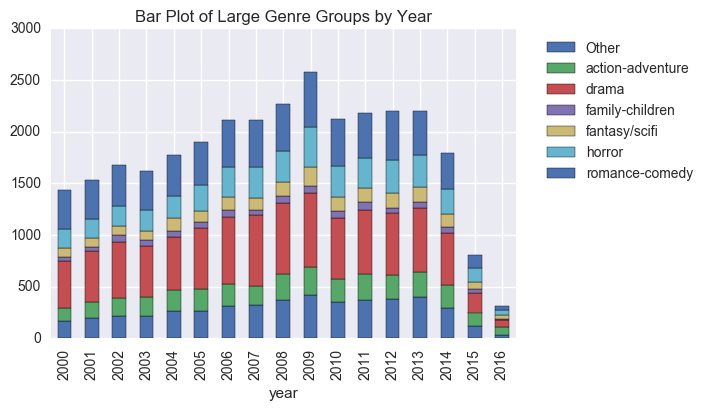

In [20]:
sub3.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title("Bar Plot of Large Genre Groups by Year")

We can understand more from the second plot above after roll-up into larger groups. First, we can see that the largest group across all years is drama, followed by romance-comedy, and then horror and other follow. Family-children genre makes up a very small fraction of movies in this dataset. It is also surprising that action-adventure is not a larger portion.

Next, we will look explore correlation between genre and gross sales

## Genre Trends by Gross Sales (OLAP + Correlation Discovery)


In [21]:
subdf.head()

,lid,rid,title,year,genres,gross,cast_total_facebook_likes,director_facebook_likes,imdb_score,bigGenre
0,1.0,72998.0,Avatar,2009,sci-fi,760505847,4834.0,0,7.9,fantasy/scifi
1,1.0,72998.0,Avatar,2009,action,760505847,4834.0,0,7.9,action-adventure
2,1.0,72998.0,Avatar,2009,fantasy,760505847,4834.0,0,7.9,fantasy/scifi
3,1.0,72998.0,Avatar,2009,adventure,760505847,4834.0,0,7.9,action-adventure
4,1.0,72998.0,Avatar,2009,imax,760505847,4834.0,0,7.9,Other


In [22]:
subdf['grossnum'] = pd.to_numeric(subdf['gross'].str.replace('.','').str.replace('NaN', ''))
grossdf = subdf.dropna(axis=0, how='any')
grossdf.shape

(11160, 11)

In [23]:
#select distinct
grossdf['rid'].duplicated()
dfuni = grossdf.loc[~grossdf['rid'].duplicated()]
dfuni.shape

(2776, 11)

In [24]:
dfuni.head()

,lid,rid,title,year,genres,gross,cast_total_facebook_likes,director_facebook_likes,imdb_score,bigGenre,grossnum
0,1.0,72998.0,Avatar,2009,sci-fi,760505847,4834.0,0,7.9,fantasy/scifi,760505847.0
5,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,comedy,309404152,48350.0,563,7.1,romance-comedy,309404152.0
9,3.0,127216.0,Unexpected,2015,action,200074175,11700.0,0,6.8,action-adventure,200074175.0
14,4.0,91529.0,"Dark Knight Rises, The",2012,crime,448130642,106759.0,22000,8.5,drama,448130642.0
20,6.0,93363.0,John Carter,2012,sci-fi,73058679,1873.0,475,6.6,fantasy/scifi,73058679.0


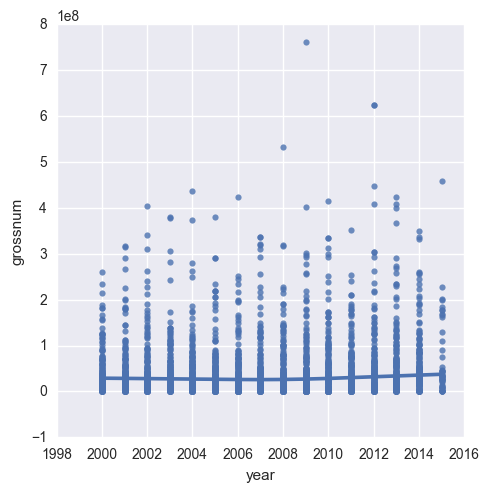

In [25]:
sns.lmplot(x="year",y="grossnum",data=dfuni, lowess=True)


In [26]:
dfuni.grossnum.describe() #that max number is quite large, let's explore

count    2.776000e+03
mean     4.811070e+07
std      6.924786e+07
min      1.620000e+02
25%      4.690815e+06
50%      2.449804e+07
75%      6.068819e+07
max      7.605058e+08
Name: grossnum, dtype: float64

In [27]:
dfuni.sort_values(by="grossnum", ascending=False)

,lid,rid,title,year,genres,gross,cast_total_facebook_likes,director_facebook_likes,imdb_score,bigGenre,grossnum
0,1.0,72998.0,Avatar,2009,sci-fi,760505847,4834.0,0,7.9,fantasy/scifi,760505847.0
3507,795.0,93498.0,Game Change,2012,sci-fi,623279547,87697.0,0,8.1,fantasy/scifi,623279547.0
72,18.0,89745.0,"Avengers, The",2012,sci-fi,623279547,87697.0,0,8.1,fantasy/scifi,623279547.0
297,67.0,58559.0,"Dark Knight, The",2008,crime,533316061,57802.0,22000,9.0,drama,533316061.0
36,9.0,nan,avengers: age of ultron,2015,action,458991599,92000.0,0,7.5,action-adventure,458991599.0
14,4.0,91529.0,"Dark Knight Rises, The",2012,crime,448130642,106759.0,22000,8.5,drama,448130642.0
2649,583.0,8360.0,Shrek 2,2004,animation,436471036,1148.0,80,7.2,Other,436471036.0
877,187.0,106487.0,"Hunger Games: Catching Fire, The",2013,sci-fi,424645577,49355.0,508,7.6,fantasy/scifi,424645577.0
55,14.0,45722.0,Pirates of the Caribbean: Dead Man's Chest,2006,fantasy,423032628,48486.0,563,7.3,fantasy/scifi,423032628.0
195,44.0,78499.0,Toy Story 3,2010,animation,414984497,19085.0,125,8.3,Other,414984497.0


The highest grossing movie in the dataset is Avatar followed by Avengers. Least grossing movies are Pride and The Hire:Chosen

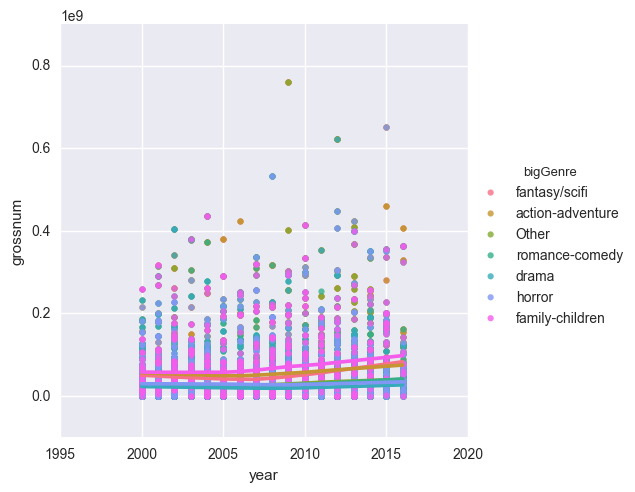

In [28]:
sns.lmplot(x="year",y="grossnum", hue="bigGenre",data=grossdf, lowess=True)

It looks like there has been a slight uptick in family-children films and and also fantasy/scifi. 

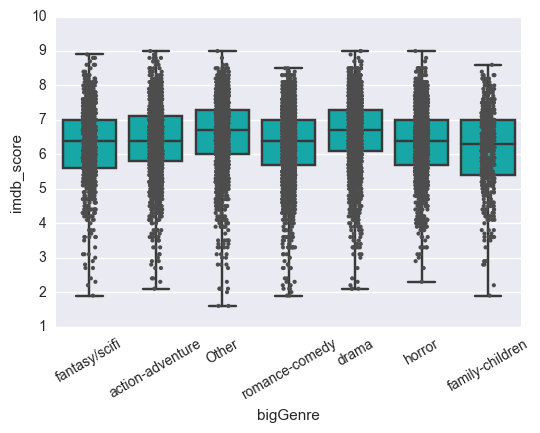

In [29]:
ax = sns.boxplot(x="bigGenre", y="imdb_score", data=grossdf, whis = np.inf, color = "c")

ax.set_xticklabels(labels = grossdf["bigGenre"].value_counts().index.tolist(),rotation=30)

sns.stripplot(x="bigGenre", y="imdb_score", data=grossdf,
              jitter=True, size=3, color=".3", linewidth=0)

Not much of a difference in genre based on imdb_score

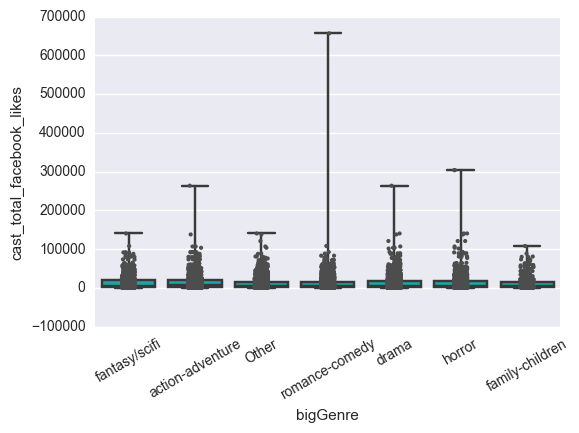

In [30]:
ax = sns.boxplot(x="bigGenre", y="cast_total_facebook_likes", data=grossdf, whis = np.inf, color = "c")

ax.set_xticklabels(labels = grossdf["bigGenre"].value_counts().index.tolist(),rotation=30)

sns.stripplot(x="bigGenre", y="cast_total_facebook_likes", data=grossdf,
              jitter=True, size=3, color=".3", linewidth=0)

It looks like there is a large range in between genres in how many cast_total_facebook_likes there were, with romance-comedy having the largest spread and family-children having the least spread.

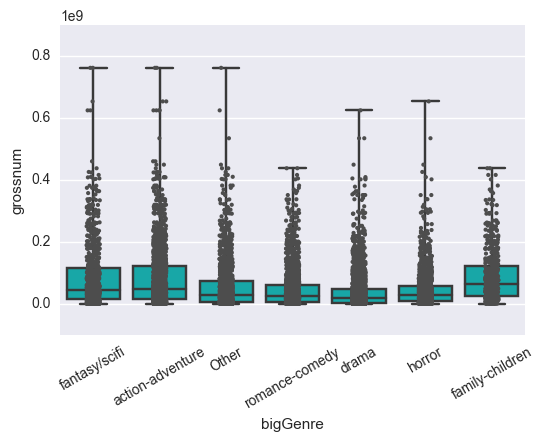

In [31]:
ax = sns.boxplot(x="bigGenre", y="grossnum", data=grossdf, whis = np.inf, color = "c")

ax.set_xticklabels(labels = grossdf["bigGenre"].value_counts().index.tolist(),rotation=30)

sns.stripplot(x="bigGenre", y="grossnum", data=grossdf,
              jitter=True, size=3, color=".3", linewidth=0)




From the boxplots, we also see that romance-comedy and family-children appear to be the genres which vary the least in terms of gross sales.

### Correlation Matrix

In [32]:
dfuni.corr()

,cast_total_facebook_likes,imdb_score,grossnum
cast_total_facebook_likes,1.000000,0.096706,0.251049
imdb_score,0.096706,1.000000,0.179394
grossnum,0.251049,0.179394,1.000000


No correlation identified between gross sales and facebook likes/imdb score nor imdb_score and facebook likes.

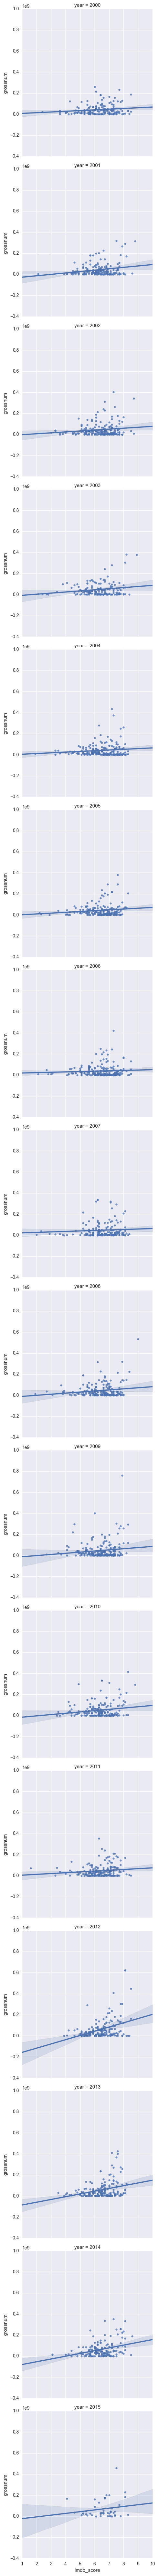

In [35]:
sns.lmplot(x="imdb_score",y="grossnum", row="year",data=dfuni)

This results are interesting. There appears to be no relationship between imdb_score and grossnum until 2012 and later, when there is a reasonable positive relationship between the two. This could be due to the spread of imdb as a movie review source, but further exploration is needed.

In [34]:
pd.pivot_table(dfuni, index=['year'], aggfunc="mean")

,cast_total_facebook_likes,grossnum,imdb_score
year,,,
2000,8761.625767,4.262561e+07,6.257055
2001,8842.814607,4.309470e+07,6.271910
2002,9047.164894,4.474201e+07,6.337234
2003,8121.584416,4.850208e+07,6.285065
2004,12783.533679,4.128821e+07,6.465803
2005,10183.207254,4.298965e+07,6.408808
2006,10225.596059,3.807634e+07,6.434975
2007,10698.500000,4.714175e+07,6.571765
2008,11781.698980,4.482065e+07,6.399490


From the above table, we can also identify  that cast_total_facebook_likes on average have been steadily increasing, giving evidence to our earlier theory that much of this can be driven by the increasing prominence and use of IMDB as a review website and database. We also find that on average, grossnum has been steadily increase (aside from a dip in 2006 and 2011). IMDB score, interestingly, has not really changed. Again 2015 data should be interpreted with a grain of salt.

## Insights


Our initial insights on this dataset:

- data for 2015 appears to incomplete (anomaly year)
- more information is needed on how data was collected. Early 2000's data show much fewer movies being made. Is this an artificat of the selection criteria in creating the dataset or is that accurate?
- boost in movies coming out between 2008 - 2013
- largest group by genre is drama, followed by romance-comedy; action-adventure is a smaller portion than expected
- The highest grossing movie in the dataset is Avatar followed by Avengers. Least grossing movies are Pride and The Hire:Chosen
- It looks like there has been a slight uptick in fmaily-children films and and also fantasy/scifi. 
- romance-comedy and family-children appear to be the genres which vary the least in terms of gross sales.
- No correlation identified between gross sales and facebook likes/imdb score nor imdb_score and facebook likes.
- There appears to be no relationship between imdb_score and grossnum until 2012 and later, when there is a reasonable positive relationship between the two.
- cast_total_facebook_likes on average have been steadily increasing, giving evidence to our earlier theory that much of this can be driven by the increasing prominence and use of IMDB as a review website and database. 

## Future Work

Given time constraints, we weren't able to fully go through the dataset as much as we would have liked. Below are some next steps:

- 1) the dataset
    - further exploration into how the data was selected to identify any inherent biases in the data
    - check if gross sales are on the same unit (USD versus other currency) and scaling
- 2) analysis
    - a clustering analysis to determine which genres tend to go together most often
    - determine if there is a genre cluster that does best with our continuous measures of gross sales, imdb_score, and cast_total_facebook_likes